In [4]:
import pandas as pd
df = pd.read_csv('shopping_trends_updated.csv')
print(df.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [5]:
print(df.isnull().sum())

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [6]:
print(df.dtypes)

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object


In [7]:
print(df.duplicated().sum())

0


In [8]:
df.to_csv('cleaned_customer_journey_data.csv', index=False)

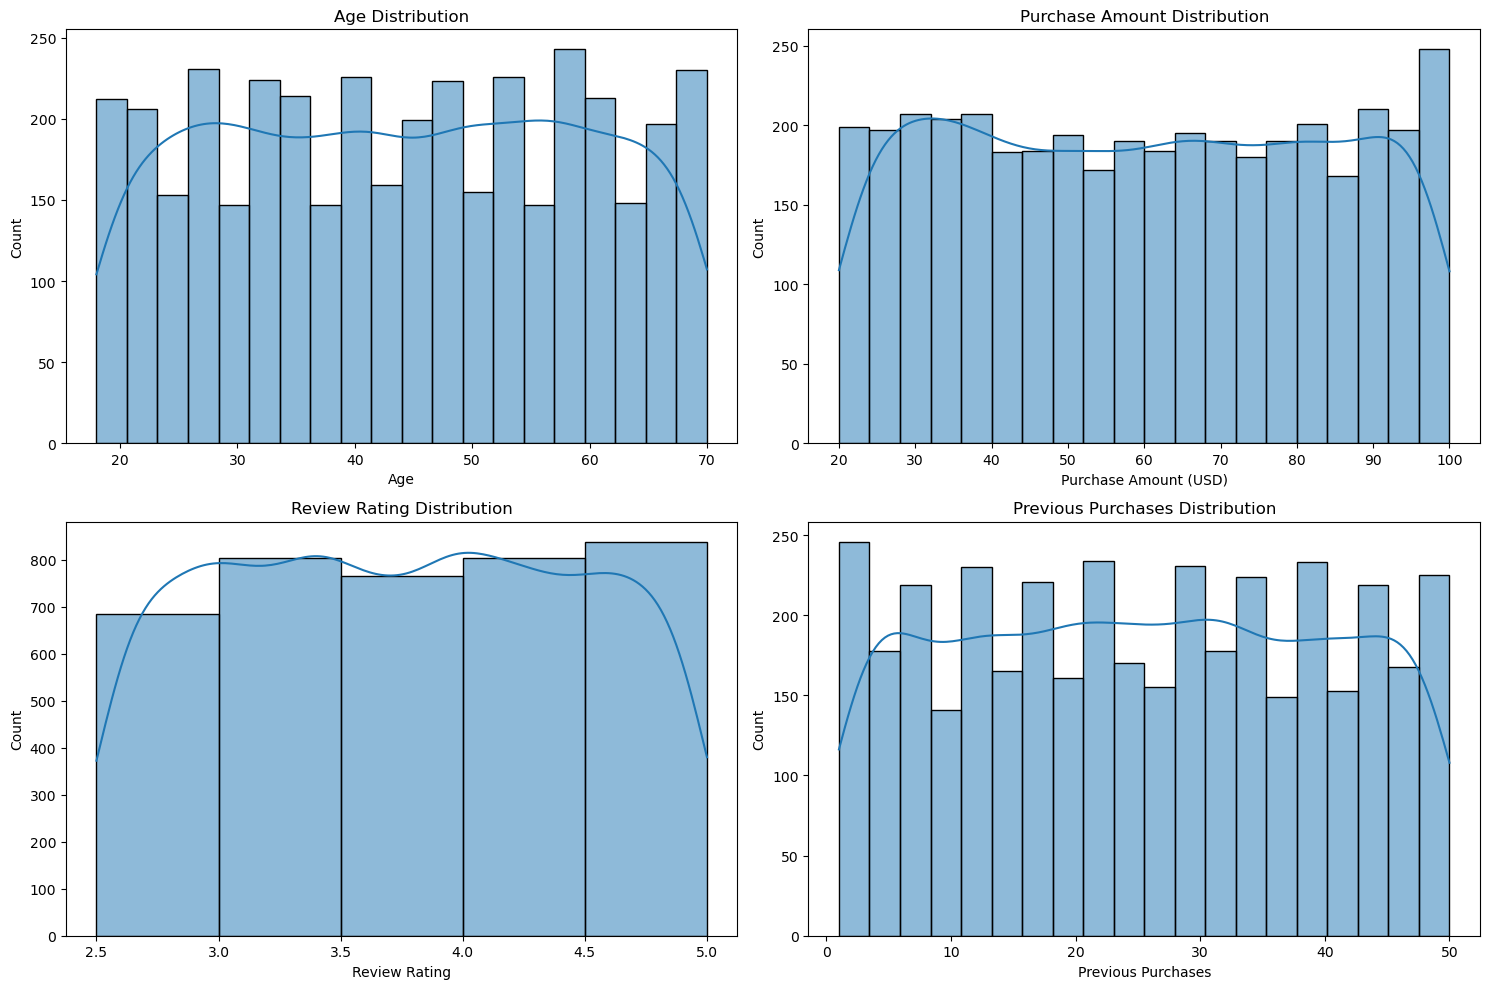

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['Purchase Amount (USD)'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Purchase Amount Distribution')

sns.histplot(df['Review Rating'], bins=5, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Review Rating Distribution')

sns.histplot(df['Previous Purchases'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Previous Purchases Distribution')

plt.tight_layout()
plt.show()

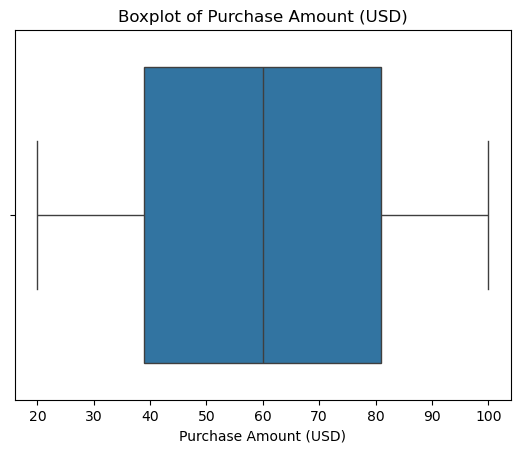

In [10]:
sns.boxplot(x=df['Purchase Amount (USD)'])
plt.title('Boxplot of Purchase Amount (USD)')
plt.show()

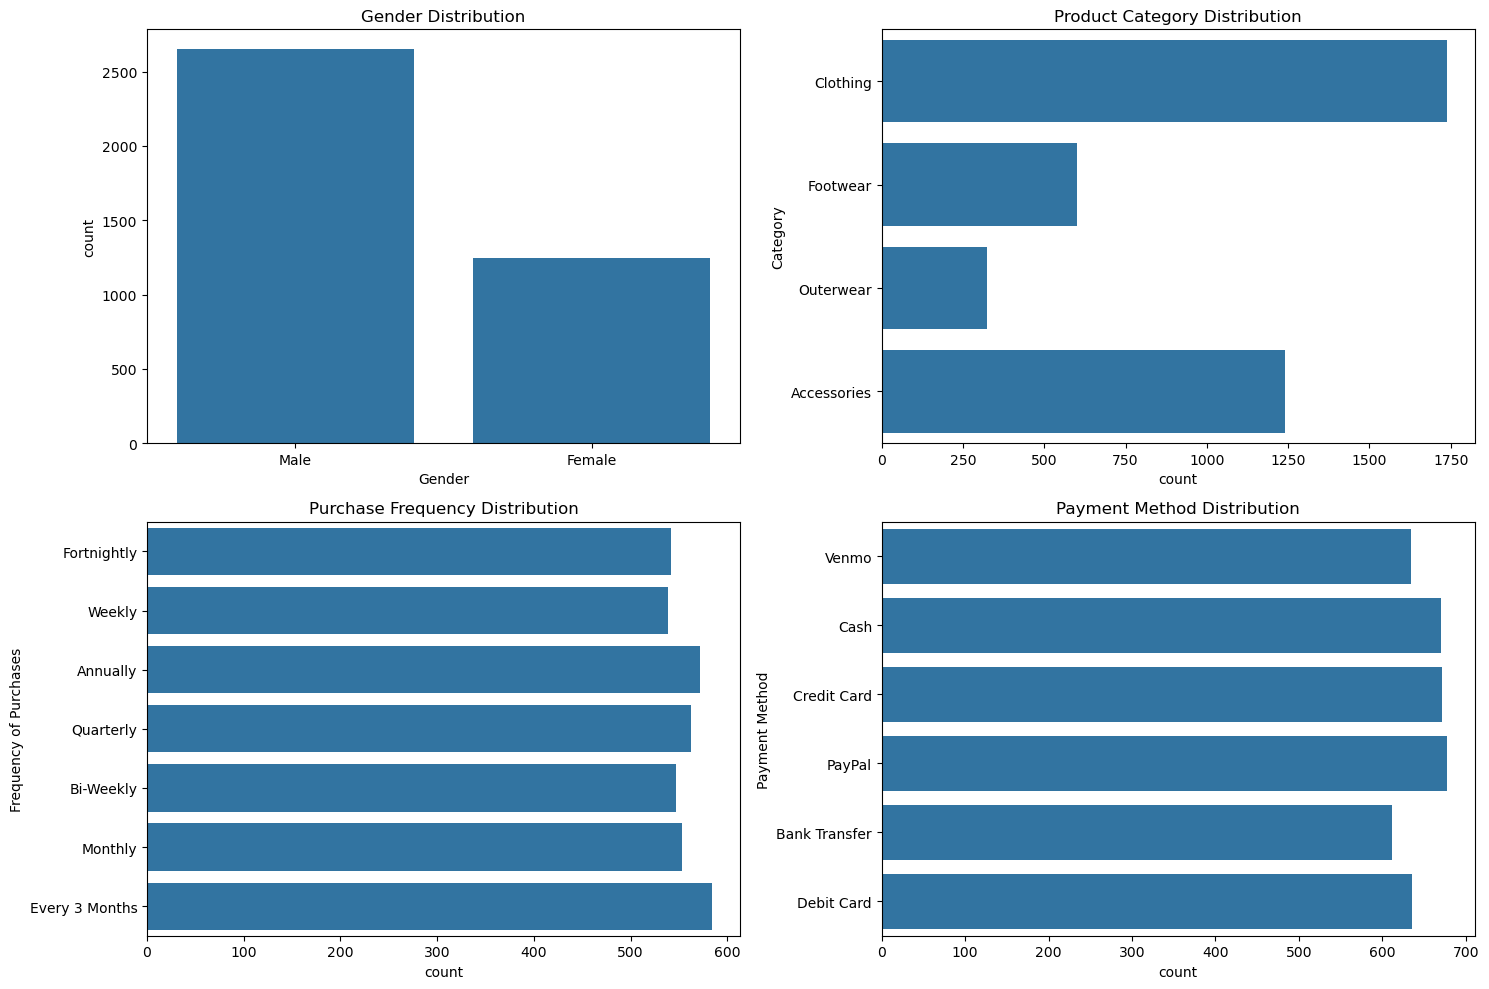

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x='Gender', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

sns.countplot(y='Category', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Product Category Distribution')

sns.countplot(y='Frequency of Purchases', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Purchase Frequency Distribution')

sns.countplot(y='Payment Method', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Payment Method Distribution')

plt.tight_layout()
plt.show()

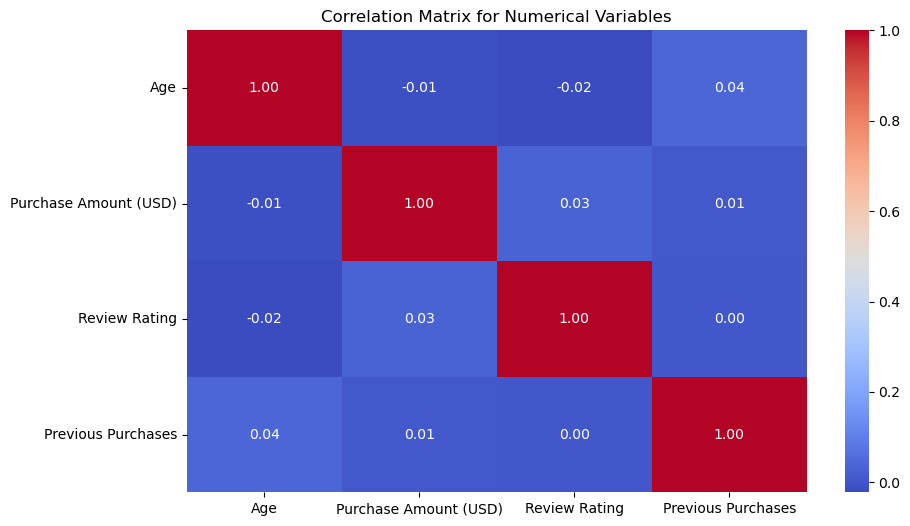

In [12]:
numerical_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

In [47]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=[
    'Gender', 'Category', 'Location', 'Size', 'Color', 'Season', 
    'Shipping Type', 'Payment Method', 'Frequency of Purchases'
], drop_first=True)

# Display the first few rows of the encoded dataframe
print(df_encoded.head())

   Customer ID  Age Item Purchased  Purchase Amount (USD)  Review Rating  \
0            1   55         Blouse                     53            3.1   
1            2   19        Sweater                     64            3.1   
2            3   50          Jeans                     73            3.1   
3            4   21        Sandals                     90            3.5   
4            5   45         Blouse                     49            2.7   

  Subscription Status Discount Applied Promo Code Used  Previous Purchases  \
0                 Yes              Yes             Yes                  14   
1                 Yes              Yes             Yes                   2   
2                 Yes              Yes             Yes                  23   
3                 Yes              Yes             Yes                  49   
4                 Yes              Yes             Yes                  31   

   Gender_Male  ...  Payment Method_Credit Card  Payment Method_Debit Card

In [48]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# Normalize numerical features
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the first few rows of the normalized dataframe
print(df_encoded.head())

   Customer ID       Age Item Purchased  Purchase Amount (USD)  Review Rating  \
0            1  0.718913         Blouse              -0.285629      -0.907584   
1            2 -1.648629        Sweater               0.178852      -0.907584   
2            3  0.390088          Jeans               0.558882      -0.907584   
3            4 -1.517099        Sandals               1.276716      -0.349027   
4            5  0.061263         Blouse              -0.454531      -1.466141   

  Subscription Status Discount Applied Promo Code Used  Previous Purchases  \
0                 Yes              Yes             Yes           -0.785831   
1                 Yes              Yes             Yes           -1.616552   
2                 Yes              Yes             Yes           -0.162789   
3                 Yes              Yes             Yes            1.637107   
4                 Yes              Yes             Yes            0.391025   

   Gender_Male  ...  Payment Method_Credit C

In [49]:
# Create new features
df_encoded['CLV'] = df_encoded['Purchase Amount (USD)'] * df_encoded['Previous Purchases']
df_encoded['Average Purchase Amount'] = df_encoded['Purchase Amount (USD)'] / (df_encoded['Previous Purchases'] + 1)

# Display the first few rows with new features
print(df_encoded.head())

   Customer ID       Age Item Purchased  Purchase Amount (USD)  Review Rating  \
0            1  0.718913         Blouse              -0.285629      -0.907584   
1            2 -1.648629        Sweater               0.178852      -0.907584   
2            3  0.390088          Jeans               0.558882      -0.907584   
3            4 -1.517099        Sandals               1.276716      -0.349027   
4            5  0.061263         Blouse              -0.454531      -1.466141   

  Subscription Status Discount Applied Promo Code Used  Previous Purchases  \
0                 Yes              Yes             Yes           -0.785831   
1                 Yes              Yes             Yes           -1.616552   
2                 Yes              Yes             Yes           -0.162789   
3                 Yes              Yes             Yes            1.637107   
4                 Yes              Yes             Yes            0.391025   

   Gender_Male  ...  Payment Method_PayPal  

In [52]:
from sklearn.decomposition import PCA

# Initialize PCA (retain 95% variance)
pca = PCA(n_components=0.95)

# Fit PCA to the preprocessed data
principal_components = pca.fit_transform(df_encoded)

# Create a DataFrame for the principal components
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Display the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Number of Components:", pca.n_components_)

ValueError: could not convert string to float: 'Blouse'

In [53]:
df.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [55]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns for one-hot encoding
categorical_cols = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 
                    'Season', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 
                    'Payment Method', 'Frequency of Purchases']

encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity
encoded_array = encoder.fit_transform(df[categorical_cols])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and merge encoded data
df_numeric = df.drop(columns=categorical_cols).reset_index(drop=True)
df_encoded = pd.concat([df_numeric, encoded_df], axis=1)

In [56]:
from sklearn.decomposition import PCA

# Initialize PCA (retain 95% variance)
pca = PCA(n_components=0.95)

# Fit PCA to the preprocessed data
principal_components = pca.fit_transform(df_encoded)

# Create a DataFrame for the principal components
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Display the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Number of Components:", pca.n_components_)

ValueError: could not convert string to float: 'Yes'

In [57]:
from sklearn.preprocessing import LabelEncoder

# List of binary categorical columns
binary_cols = ['Subscription Status', 'Discount Applied', 'Promo Code Used']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])  # Converts 'Yes'/'No' to 1/0


In [58]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns excluding already label-encoded ones
categorical_cols = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 
                    'Season', 'Shipping Type', 'Payment Method', 'Frequency of Purchases']

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = encoder.fit_transform(df[categorical_cols])

# Convert to DataFrame
import pandas as pd
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and merge encoded data
df_numeric = df.drop(columns=categorical_cols).reset_index(drop=True)
df_encoded = pd.concat([df_numeric, encoded_df], axis=1)


In [59]:
from sklearn.decomposition import PCA

# Initialize PCA (retain 95% variance)
pca = PCA(n_components=0.95)

# Fit PCA to the preprocessed data
principal_components = pca.fit_transform(df_encoded)

# Create a DataFrame for the principal components
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Display the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Number of Components:", pca.n_components_)

Explained Variance Ratio: [0.9992057]
Number of Components: 1


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# Apply PCA
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(scaled_data)

# Convert to DataFrame
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Number of Components:", pca.n_components_)


Explained Variance Ratio: [0.0305135  0.01903449 0.01680272 0.01209815 0.01165763 0.01125978
 0.01112194 0.01063287 0.01061402 0.01051823 0.01037787 0.01029357
 0.01018872 0.01013568 0.00995845 0.00987411 0.00982325 0.00974973
 0.00965352 0.00962155 0.00956476 0.00946081 0.00942772 0.00938897
 0.00937449 0.00928169 0.0092255  0.0091629  0.00911751 0.00905897
 0.0089422  0.00893259 0.00890466 0.00884582 0.0088178  0.00874131
 0.00872229 0.00867936 0.00865317 0.00858017 0.00855787 0.00850284
 0.00848933 0.0084593  0.0084349  0.00842425 0.00835612 0.00830159
 0.00823225 0.00820741 0.0081846  0.00816511 0.00813162 0.00808306
 0.00805303 0.00801575 0.00798141 0.00794454 0.0079065  0.00788809
 0.00787982 0.00785178 0.00781858 0.00776206 0.00775613 0.0077099
 0.00768976 0.00766913 0.00764545 0.00762406 0.0076127  0.00759768
 0.00755993 0.00752777 0.00750865 0.00748527 0.00745153 0.00743156
 0.00740463 0.00737209 0.00734081 0.00732383 0.00727092 0.00724839
 0.00722074 0.00717995 0.00716115 0.0

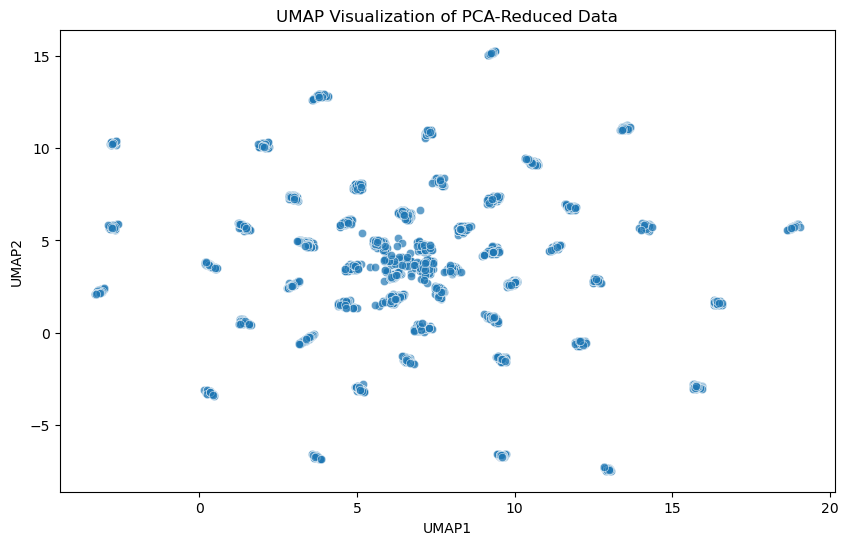

In [63]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce PCA components to 2D using UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

umap_result = reducer.fit_transform(df_pca)

# Create a DataFrame for visualization
df_umap = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', data=df_umap, alpha=0.7)
plt.title('UMAP Visualization of PCA-Reduced Data')
plt.show()


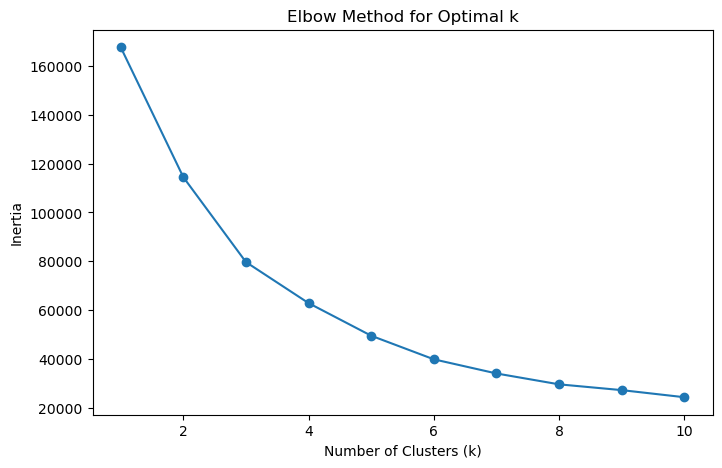

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define range for k values
k_values = range(1, 11)
inertia = []

# Apply K-Means for each k and record inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(umap_result)  # pca_data should be the PCA-reduced dataset
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

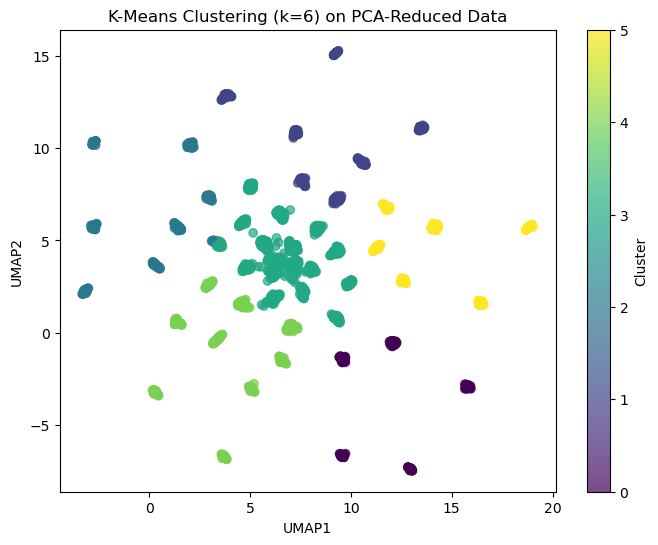

In [73]:
# Apply K-Means with the chosen k
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(umap_result)  # Assign clusters

# Visualize clusters using UMAP
plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('K-Means Clustering (k=6) on PCA-Reduced Data')
plt.colorbar(label="Cluster")
plt.show()

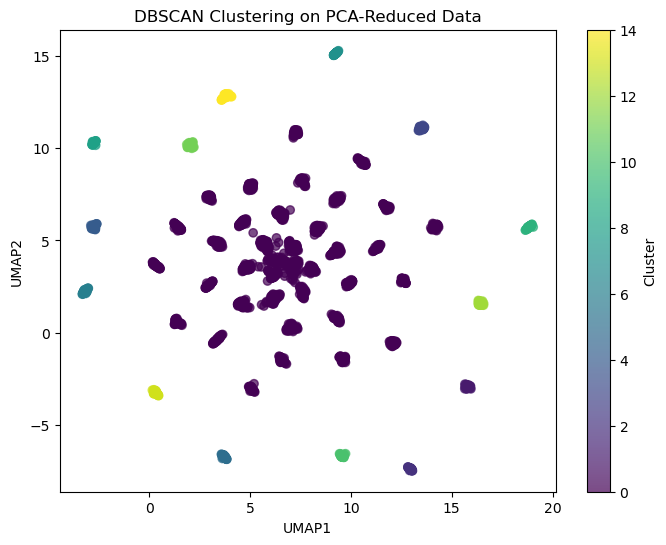

In [77]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=2.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(umap_result)

# Plot DBSCAN results
plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.colorbar(label="Cluster")
plt.show()

In [85]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(umap_result, cluster_labels)
import numpy as np

# Exclude noise points (-1 labels)
mask = dbscan_labels != -1  
if len(np.unique(dbscan_labels[mask])) > 1:  # At least two clusters required
    silhouette_dbscan = silhouette_score(umap_result[mask], dbscan_labels[mask])
    print("Silhouette Score for DBSCAN:", silhouette_dbscan)
else:
    print("Silhouette Score for DBSCAN cannot be calculated (only one cluster after noise removal).")


print("Silhouette Score for K-Means:", silhouette_kmeans)

Silhouette Score for DBSCAN: 0.2582053
Silhouette Score for K-Means: 0.37573886


In [86]:
np.sum(dbscan_labels == -1)

0

In [87]:
df['Cluster'] = cluster_labels  # Assign clusters to original dataset
cluster_summary = df.groupby('Cluster').mean()  # Compute averages
print(cluster_summary)

TypeError: agg function failed [how->mean,dtype->object]

In [88]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

         Customer ID        Age  Purchase Amount (USD)  Review Rating  \
Cluster                                                                 
0        1903.352941  45.235294              58.537815       3.746779   
1        1980.851638  43.381503              59.599229       3.775530   
2        1973.705202  44.059730              60.371869       3.757611   
3        1900.839678  44.202050              59.888726       3.756515   
4        1977.456366  43.828326              59.138770       3.708727   
5        2036.929545  43.909091              60.845455       3.758409   

         Subscription Status  Discount Applied  Promo Code Used  \
Cluster                                                           
0                   0.310924          0.445378         0.445378   
1                   0.254335          0.421965         0.421965   
2                   0.265896          0.429672         0.429672   
3                   0.277452          0.445095         0.445095   
4            

In [89]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})  # Example encoding

In [90]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

         Customer ID        Age    Gender  Purchase Amount (USD)  \
Cluster                                                            
0        1903.352941  45.235294  0.319328              58.537815   
1        1980.851638  43.381503  0.323699              59.599229   
2        1973.705202  44.059730  0.341040              60.371869   
3        1900.839678  44.202050  0.306003              59.888726   
4        1977.456366  43.828326  0.313305              59.138770   
5        2036.929545  43.909091  0.345455              60.845455   

         Review Rating  Subscription Status  Discount Applied  \
Cluster                                                         
0             3.746779             0.310924          0.445378   
1             3.775530             0.254335          0.421965   
2             3.757611             0.265896          0.429672   
3             3.756515             0.277452          0.445095   
4             3.708727             0.273247          0.417740   


In [91]:
import numpy as np

if not np.issubdtype(cluster_labels.dtype, np.number):
    print("Error: cluster_labels contains non-numeric values.")

In [93]:
df['Cluster'] = cluster_labels  # Assign clusters to original dataset
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)  # Compute averages
print(cluster_summary)

         Customer ID        Age    Gender  Purchase Amount (USD)  \
Cluster                                                            
0        1903.352941  45.235294  0.319328              58.537815   
1        1980.851638  43.381503  0.323699              59.599229   
2        1973.705202  44.059730  0.341040              60.371869   
3        1900.839678  44.202050  0.306003              59.888726   
4        1977.456366  43.828326  0.313305              59.138770   
5        2036.929545  43.909091  0.345455              60.845455   

         Review Rating  Subscription Status  Discount Applied  \
Cluster                                                         
0             3.746779             0.310924          0.445378   
1             3.775530             0.254335          0.421965   
2             3.757611             0.265896          0.429672   
3             3.756515             0.277452          0.445095   
4             3.708727             0.273247          0.417740   


<Figure size 1200x600 with 0 Axes>

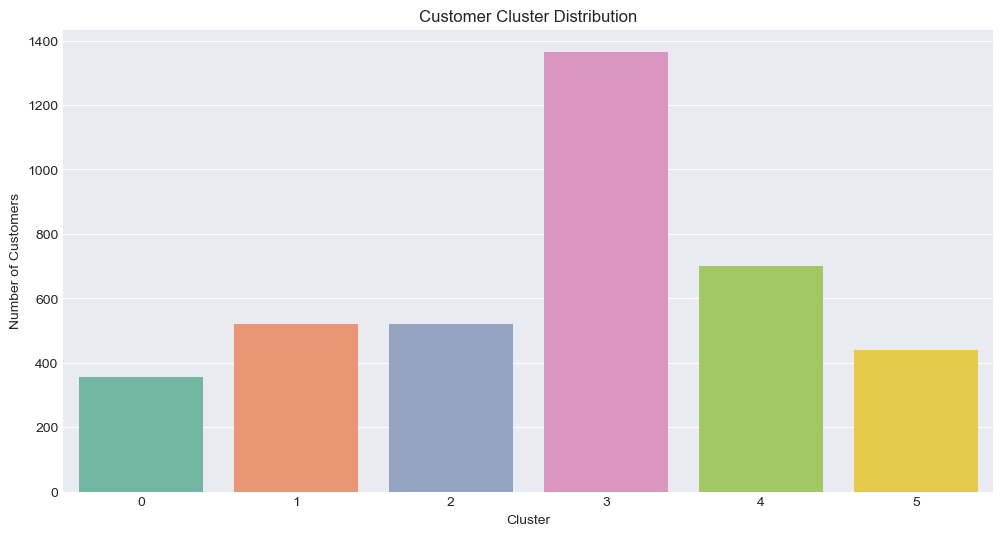

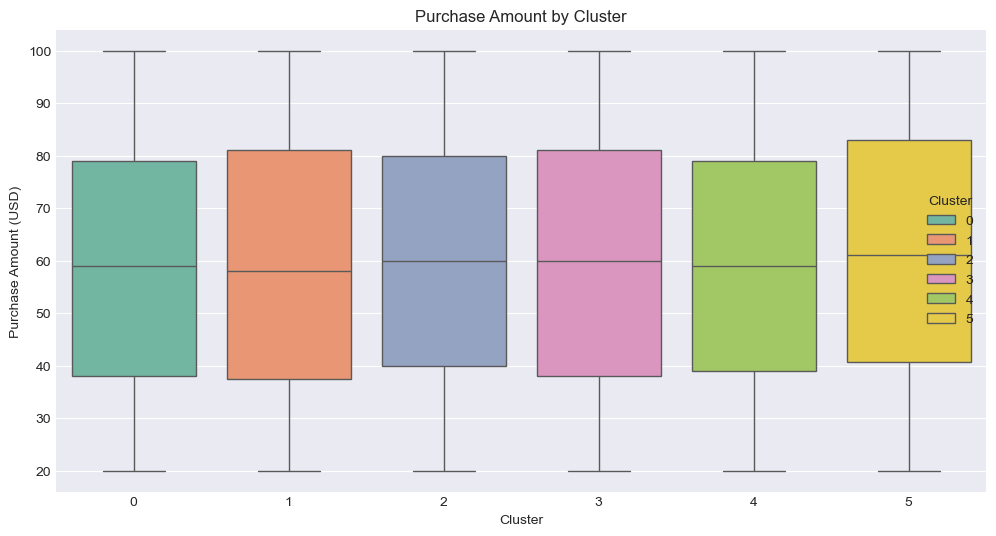

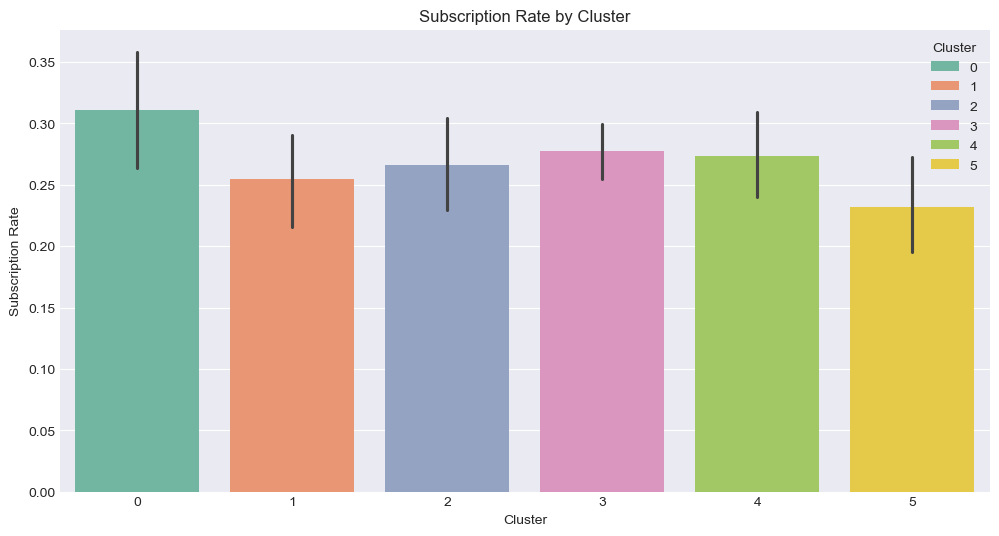

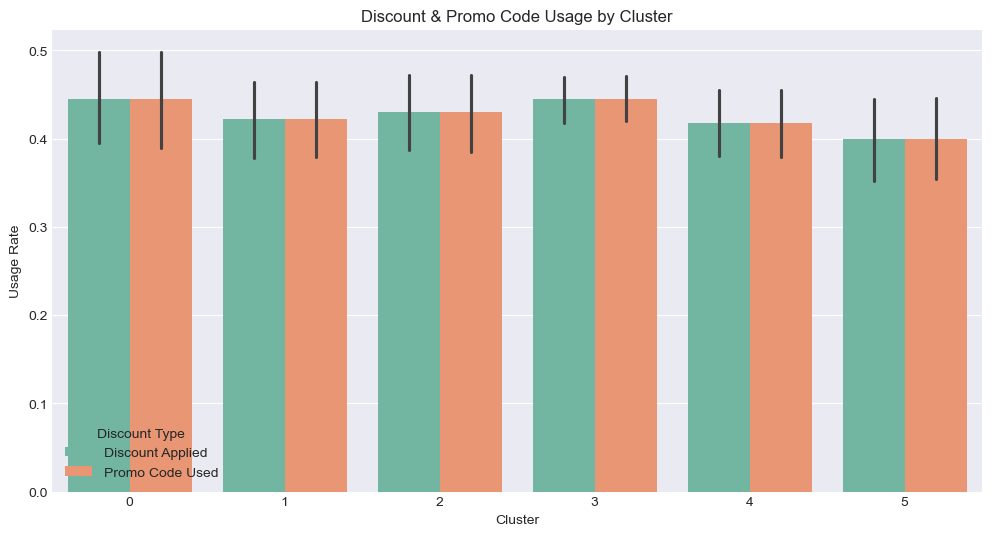

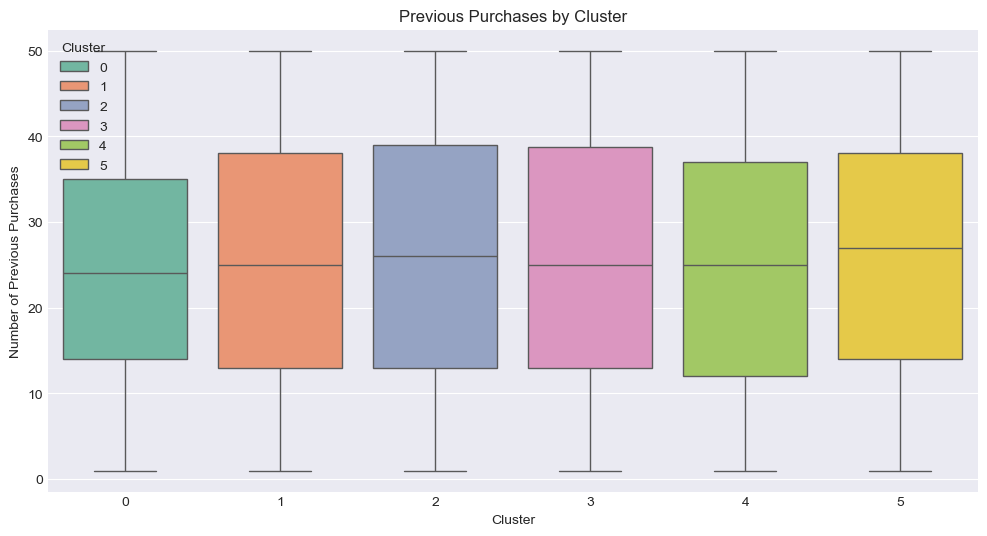

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your dataset with 'Cluster' assigned
plt.style.use('seaborn-v0_8-darkgrid')

# Set up figure size
plt.figure(figsize=(12, 6))

# 1. Cluster Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', hue='Cluster', data=df, palette="Set2", legend=False)
plt.title("Customer Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()


# 2. Purchase Amount by Cluster
plt.figure(figsize=(12, 6))
# sns.boxplot(x=df['Cluster'], y=df['Purchase Amount (USD)'], palette="Set2")
sns.boxplot(x='Cluster', hue = 'Cluster', y='Purchase Amount (USD)', data=df, palette="Set2")
plt.title("Purchase Amount by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Purchase Amount (USD)")
plt.show()

# 3. Subscription Rate by Cluster
plt.figure(figsize=(12, 6))
# sns.barplot(x=df['Cluster'], y=df['Subscription Status'], estimator=lambda x: sum(x)/len(x), palette="Set2")
sns.barplot(x='Cluster', hue = 'Cluster', y='Subscription Status', data=df, estimator=lambda x: sum(x)/len(x), palette="Set2")
plt.title("Subscription Rate by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Subscription Rate")
plt.show()

# 4. Discount & Promo Code Usage by Cluster
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars=['Cluster'], value_vars=['Discount Applied', 'Promo Code Used'], var_name='Discount Type', value_name='Usage')
sns.barplot(x='Cluster', y='Usage', hue='Discount Type', data=df_melted, palette="Set2")
plt.title("Discount & Promo Code Usage by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Usage Rate")
plt.show()

# 5. Previous Purchases by Cluster
plt.figure(figsize=(12, 6))
# sns.boxplot(x=df['Cluster'], y=df['Previous Purchases'], palette="Set2")
sns.boxplot(x='Cluster', hue = 'Cluster', y='Previous Purchases', data=df, palette="Set2")
plt.title("Previous Purchases by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Previous Purchases")
plt.show()


In [96]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
